In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')


In [95]:
dados = pd.read_csv(
    r'C:\Projetos Data Science\Análise de Dados\Mercado de Games\data\PS4_GamesSales.csv', encoding='latin-1')

In [96]:
# <--- EDA: EXPLORATORY DATA ANALYSIS ( ANÁLISE EXPLORATÓRIA DE DADOS)
#       Exploração da base de dados em busca de explorar detalhes ocultos na estrutura dos dados, 
#       identificar falhas ou comportamentos anormais, descobrir tendências e variáveis relevantes 
#       no conjunto.

In [97]:
# VERIFICAÇÃO DO TAMANHO DA BASE DE DADOS
dados.shape

(1034, 9)

In [98]:
# NOMES DAS COLUNAS
dados.columns

Index(['Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe',
       'Japan', 'Rest of World', 'Global'],
      dtype='object')

In [99]:
# VISUALIZAÇÃO DOS DADOS
dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [100]:
# ESTATISTICAS DA BASE DE DADOS
dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2015.966061,0.204613,0.248714,0.033636,0.089014,0.576054
std,1.298360,0.563471,0.785491,0.108344,0.249410,1.583534
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.020000,0.000000,0.000000,0.010000,0.060000
75%,2017.000000,0.120000,0.130000,0.030000,0.050000,0.357500
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


In [101]:
# INFORMAÇÕES SOBRE TIPO DE DADOS, QTD DE DADOS, DADOS NULOS, PRESENTES NA BASE DE DADOS
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [102]:
# VERIFICAÇÃO DOS CAMPOS NULOS
dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [103]:
# DADOS UNICOS EM CADA COLUNA
dados.nunique()

Game             1031
Year                8
Genre              17
Publisher         152
North America     129
Europe            139
Japan              45
Rest of World      85
Global            206
dtype: int64

In [104]:
# <--- TRATAMENTO DA BASE DE DADOS
#       Tratamos as colunas com os tipos de dados corretos, modificamos a estrutura dos 
#       dados para melhor visualização posteriormente.

In [105]:
# APAGANDO OS VALORES FALTANTES
dados = dados.dropna(subset='Year')

In [106]:
# TRANSFORMANDO A COLUNA 'YEAR' EM INTEIRO
dados['Year'] = pd.to_numeric(dados['Year']).apply(lambda line: int((line)))

In [107]:
# <--- ANÁLISE E VISUALIZAÇÃO DOS DADOS
#       Vamos analisar todos os dados presentes na base de dados, afim de extrair
#       informações relevantes.

[]

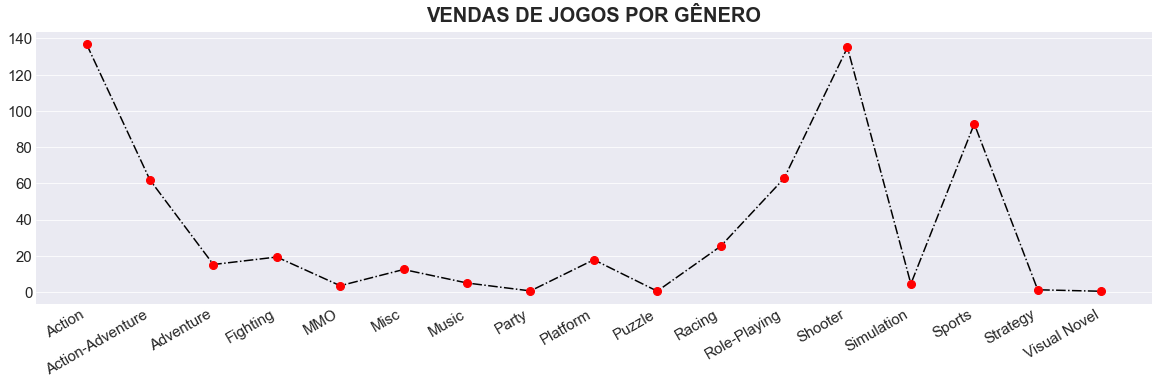

In [108]:
# ANALISE DE VENDAS POR GÊNERO
analise = dados.groupby(by=['Genre']).sum()[
    ['North America', 'Europe', 'Japan', 'Rest of World', 'Global']].reset_index()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 5), facecolor='white')
plt.grid(axis='x')
plt.title('VENDAS DE JOGOS POR GÊNERO', pad=10,
          fontdict={'size': 20, 'weight': 'bold'})
plt.plot(analise['Genre'], analise['Global'], color='black', marker='o', ms=8,
         mec='red', markerfacecolor='red', ls='-.')
plt.xticks(rotation=30, ha='right', size=15)
plt.yticks(size=15)
plt.plot()


In [109]:
# No gráfico acima, podemos ver a quantidade de vendas de jogos de PS4 separadas por gênero.
# Podemos analisar que a preferências dos Gamers são por jogos de Shooter, Action e Sports.

[]

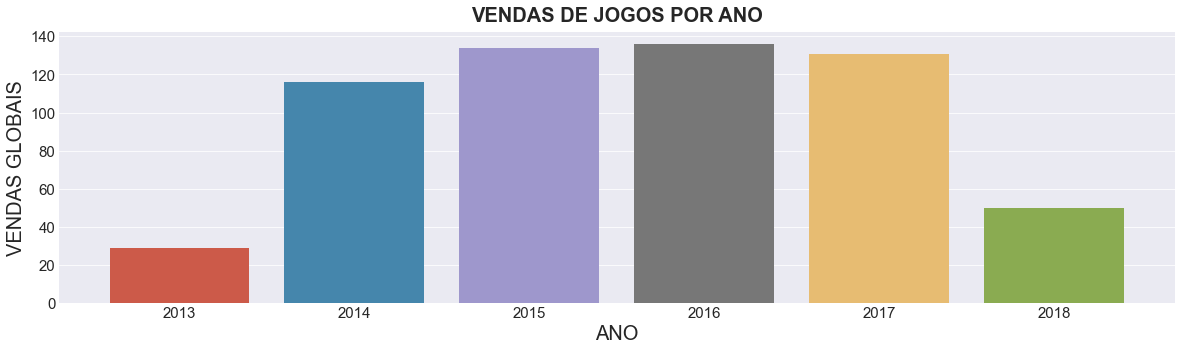

In [110]:
# ANALISE DE VENDAS DE JOGOS POR ANO
dados1 = dados.loc[dados['Year'] < 2019]
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 5), facecolor='white')
plt.grid(axis='x')
plt.title('VENDAS DE JOGOS POR ANO', pad=10,
          fontdict={'size': 20, 'weight': 'bold'})
sns.barplot(data=dados1, x='Year', y='Global', ci=None, estimator=sum)
plt.xticks(size=15,)
plt.xlabel('ANO', size=20)
plt.ylabel('VENDAS GLOBAIS', size=20)
plt.yticks(size=15)
plt.plot()


In [111]:
# Cabe analisar também, a quantidade de vendas anuais dos games. Podemos analisar um grande aumento
# nas vendas nos anos de 2014 e uma continuidade de crescimento nos anos posteriores.

[]

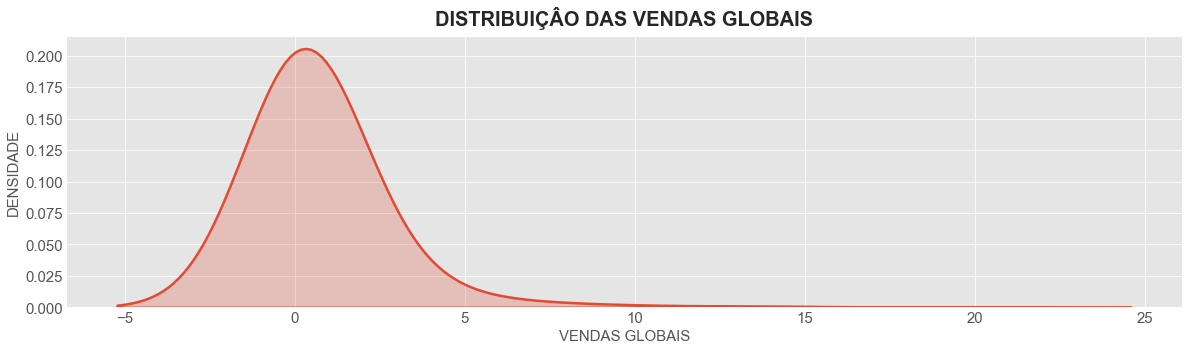

In [112]:
# ANALISE DAS DISTRIBUIÇÔES DAS VENDAS GLOBAIS
plt.figure(figsize=(20, 5), facecolor='white')
plt.style.use('ggplot')
plt.title('DISTRIBUIÇÂO DAS VENDAS GLOBAIS', pad=10,
          fontdict={'size': 20, 'weight': 'bold'})
sns.kdeplot(data=dados['Global'], shade=True,
            bw=1, linewidth=2.5)
plt.xticks(size=15,)
plt.xlabel('VENDAS GLOBAIS', size=15)
plt.ylabel('DENSIDADE', size=15)
plt.yticks(size=15)
plt.plot()


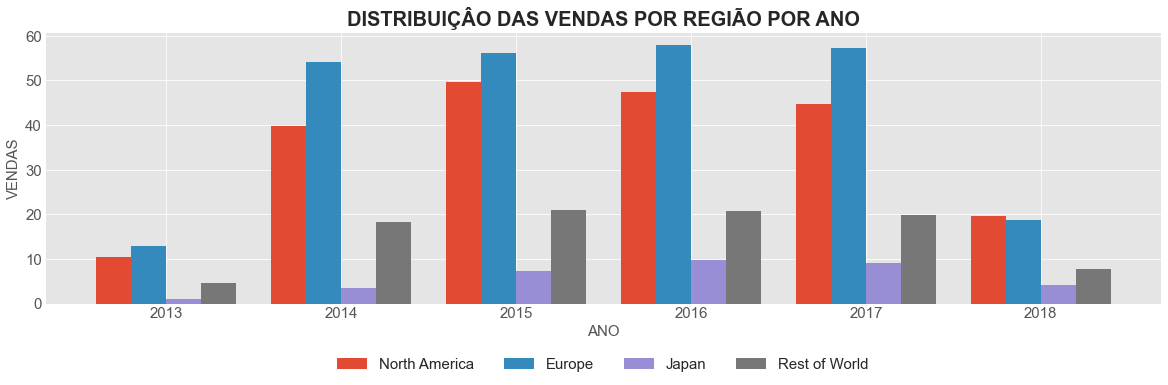

In [113]:
# DISTRIBUIÇÂO DAS VENDAS POR REGIÃO
analise2 = dados.groupby(by=['Year']).sum(
)[['North America', 'Europe', 'Japan', 'Rest of World']]
analise2 = analise2.reset_index()
analise2 = analise2.loc[analise2['Year'] < 2019]
x = np.arange(len(analise2['Year']))
plt.figure(figsize=(20, 5), facecolor='white')
plt.title('DISTRIBUIÇÂO DAS VENDAS POR REGIÃO POR ANO',
          fontdict={'weight': 'bold', 'size': 20})
plt.bar(x-0.3, analise2['North America'], width=0.2)
plt.bar(x-0.1, analise2['Europe'], width=0.2)
plt.bar(x+0.1, analise2['Japan'], width=0.2)
plt.bar(x+0.3, analise2['Rest of World'], width=0.2)
plt.xlabel("ANO", size=15)
plt.ylabel("VENDAS", size=15)
plt.legend(list(analise2.columns)[1:], fontsize=15,
           loc='best', bbox_to_anchor=(0.75, -0.15), ncol=4)
plt.xticks(x, list(analise2['Year']), size=15)
plt.yticks(size=15)
plt.show()


In [114]:
# Nesse gráfico, podemos ver as regiões que mais consomem jogos. Temos a Europe em 1º, seguida de 
# North America e em 3º o Janpan.

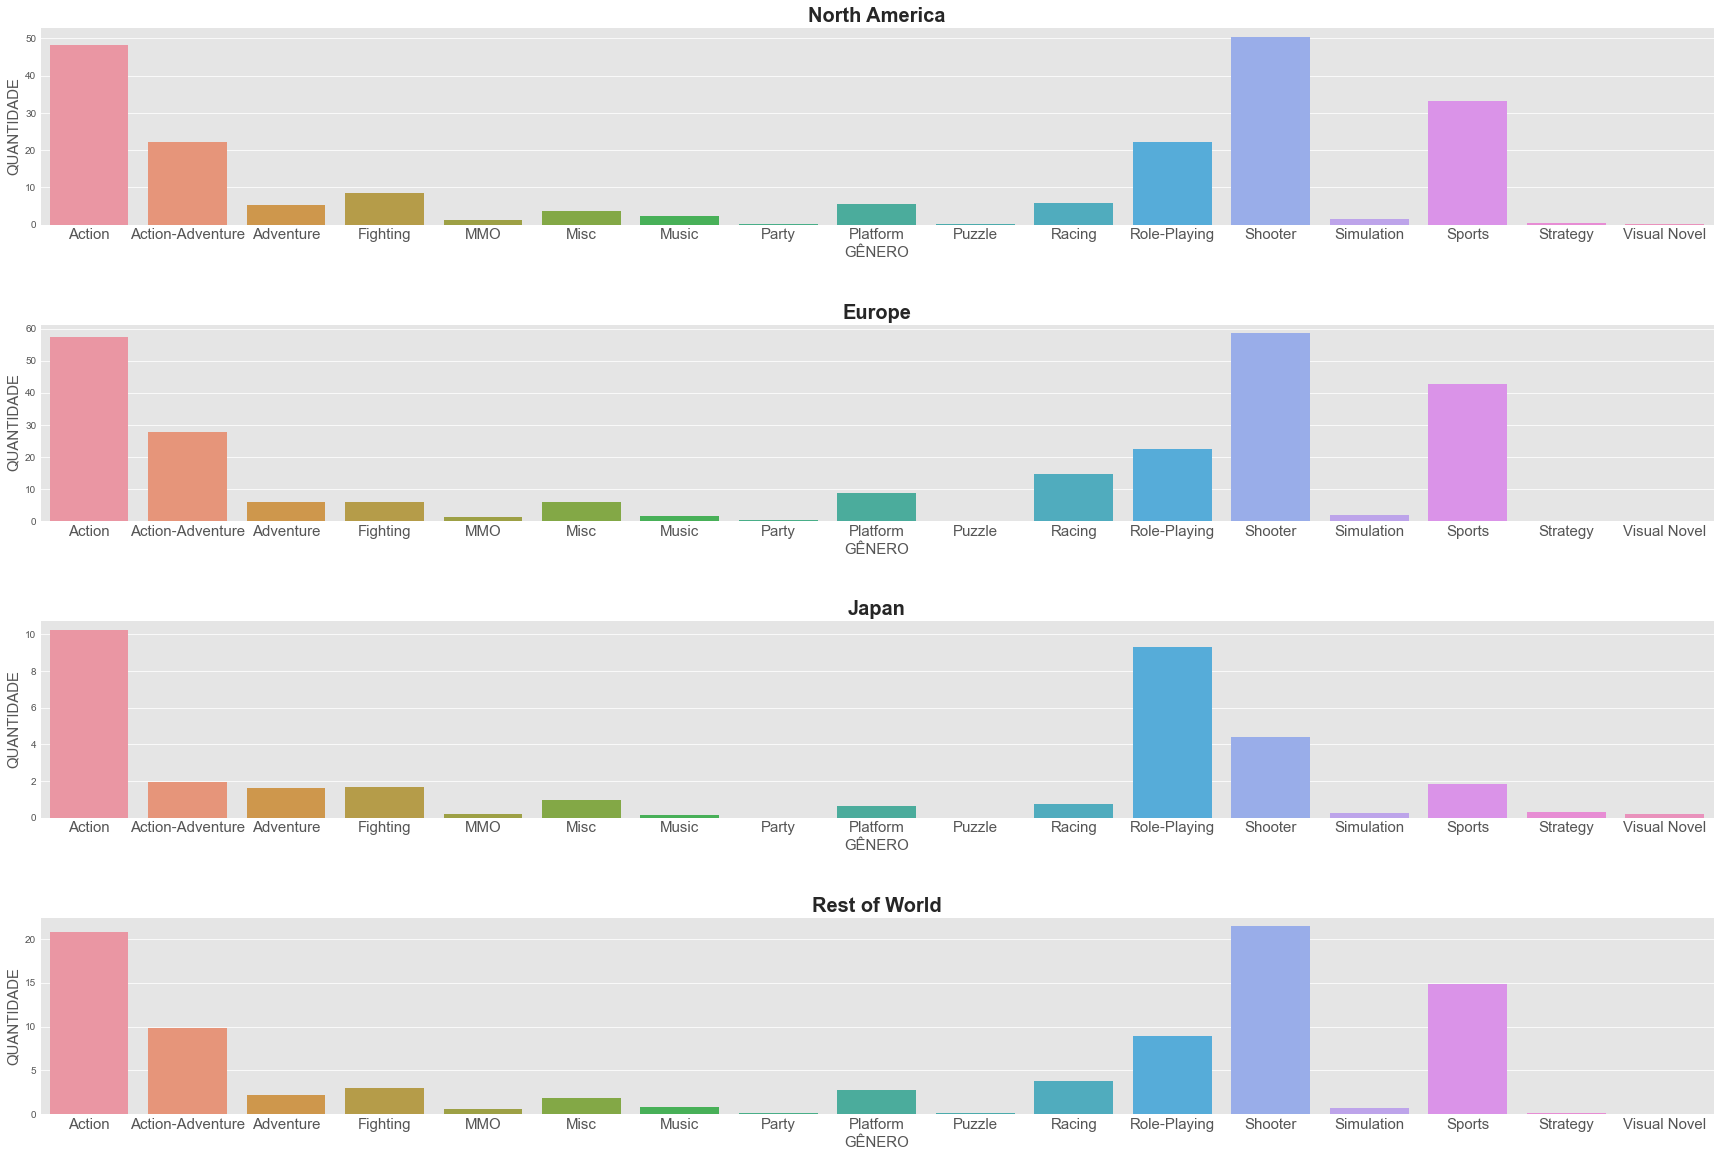

In [115]:

# ANÁLISE DE VENDAS POR REGIÃO EM RELAÇÃO AOS GÊNEROS MAIS CONSUMIDOS POR ELAS
v_catg_reg = dados.groupby(by=['Genre']).sum(
)[['North America', 'Europe', 'Japan', 'Rest of World']].reset_index()
reg = ['North America', 'Europe', 'Japan', 'Rest of World']
fig, ax = plt.subplots(figsize=(30, 20), facecolor='White')
plt.subplots_adjust(hspace=0.50, wspace=0.15)
for i in range(len(reg)):
    plt.subplot(4, 1, i+1)
    sns.barplot(x=v_catg_reg['Genre'], y=v_catg_reg[reg[i]])
    plt.title(f'{reg[i]}', pad=5, size=20, fontdict={'weight': 'bold'})
    plt.xticks(size=15)
    plt.xlabel('GÊNERO', size=15)
    plt.ylabel('QUANTIDADE', size=15)


In [116]:
# Aqui podemos analisar melhor a distribuição de vendas por gênero em cada região. Vemos as
# mesma categorias citadas acima como TOP 3 e as variações dos TOP 3 em cada região. Na North
# America: 1º- Shooter 2º- Action 3º- Sports, na Europe 1º- Shooter 2º- Action 3º- Sports, no
# Japan: 1º- Action 2º- Role-Playing 3º Shooter e no Rest of World 1º- Shooter 2º- Action 3º- Sports.

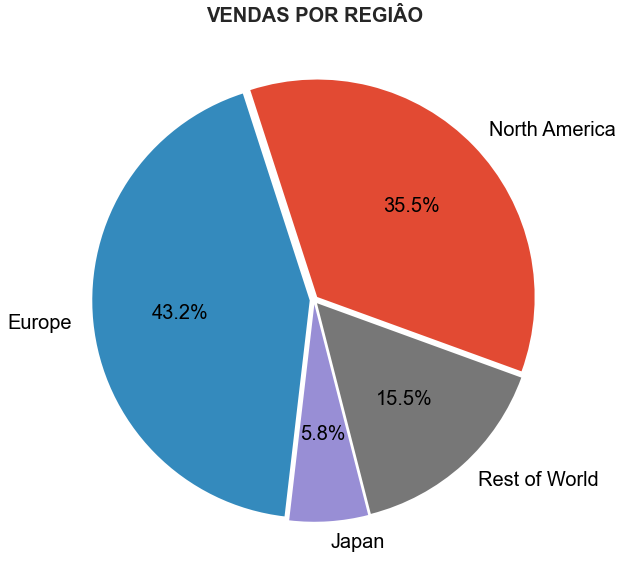

In [117]:
# VENDAS POR REGIÃO (%)
total = dados.sum()['Global']
regioes = ['North America', 'Europe', 'Japan', 'Rest of World']
porcent = []
analise3 = dados.sum()[regioes]
for i in analise3:
    porcent.append((i/total)*100)
analise3 = pd.DataFrame(list(zip(regioes, porcent)), columns=[
                        'Região', 'Porcentagem de Vendas'])
analise3['Porcentagem de Vendas'] = pd.to_numeric(
    analise3['Porcentagem de Vendas']).apply(lambda line: round(line, 2))
plt.figure(figsize=(20, 10), facecolor='white')
plt.title('VENDAS POR REGIÂO', fontdict={'weight': 'bold', 'size': 20})
plt.pie(
    analise3['Porcentagem de Vendas'],
    labels=analise3['Região'],
    rotatelabels=False,
    wedgeprops={'linewidth': 25},
    startangle=-20,
    autopct='%.1f%%',
    explode=(0.02, 0.02, 0.02, 0.02),
    textprops={'color': 'black', 'size': 20})
plt.show()


In [118]:
# Aqui podemos ver a destribuição de consumo, ou seja, a porcentagem de vendas em cada região
# em comparação a quantidade de vendas total.

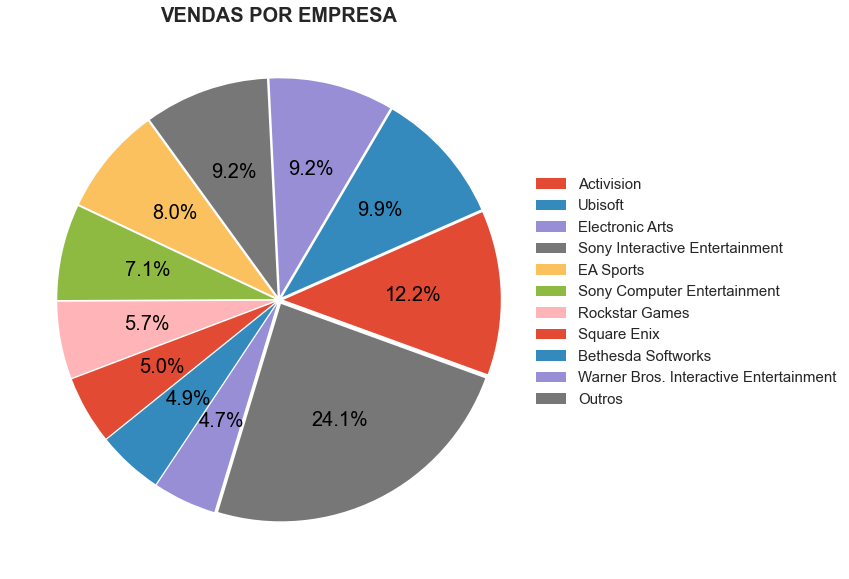

In [119]:
# VENDAS POR EMPRESA
analise4 = dados.groupby(by=['Publisher']).sum()['Global'].reset_index().sort_values('Global', ascending=False).reset_index(drop=True)
top10 = analise4.head(10)
other = pd.DataFrame([('Outros', analise4.loc[analise4.index >= 10].sum()['Global'])], columns=['Publisher', 'Global'])
analise4 = top10.append(other).reset_index(drop=True)
plt.figure(figsize=(20, 10), facecolor='white')
plt.title('VENDAS POR EMPRESA', fontdict={'weight': 'bold', 'size': 20})
plt.pie(
    analise4['Global'],
    rotatelabels=False,
    startangle=-20,
    autopct='%.1f%%',
    explode=(0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02),
    textprops={'color': 'black', 'size': 20})
plt.legend(list(analise4['Publisher']), fontsize=15,
           loc='upper right', bbox_to_anchor=(1.55, 0.75), ncol=1)
plt.show()


In [120]:
# Já nesse gráfico, podemos analisar a quantidade de vendas de cada gênero em ralação
# a quantidade de ventas total.

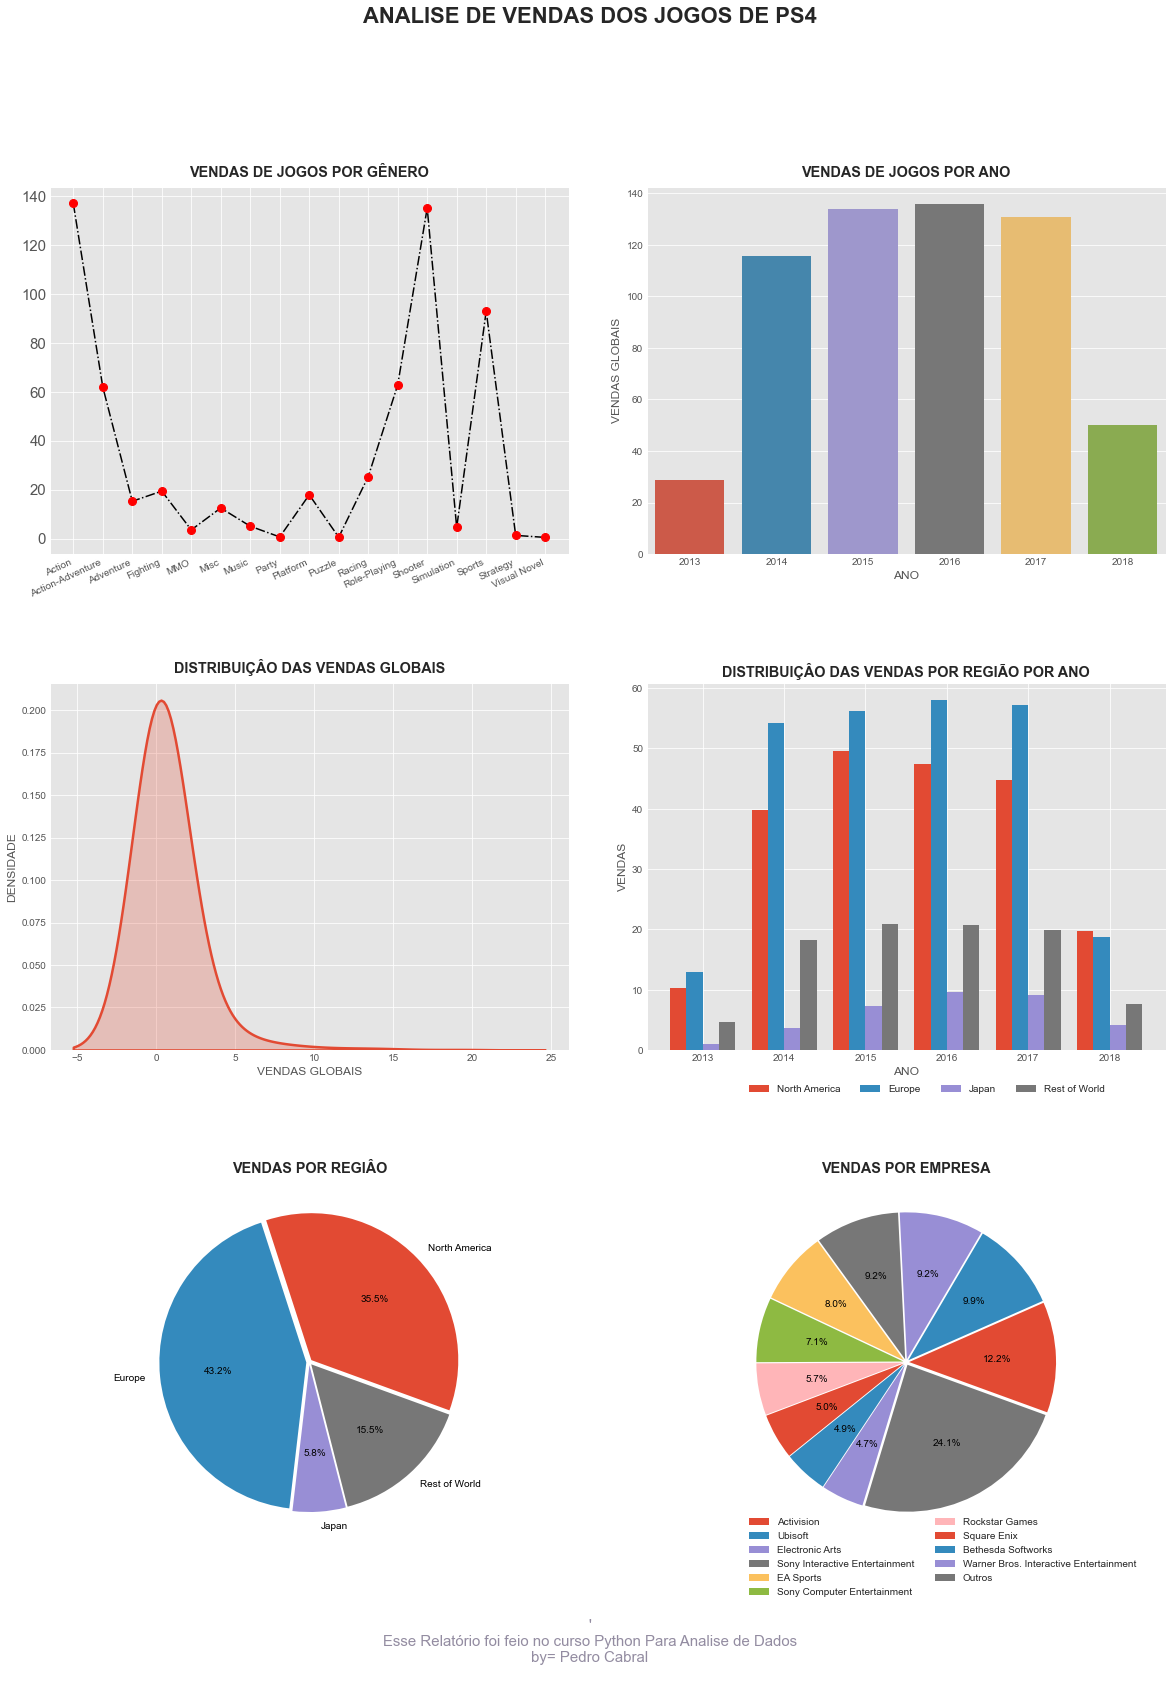

In [121]:
# ANÁLISE GERAL COM TODOS OS GRÁFICOS
fig, ax = plt.subplots(figsize=(20, 25), facecolor='white')
plt.suptitle('ANALISE DE VENDAS DOS JOGOS DE PS4', fontsize=22, fontweight=600)
columns = 3
lines = 2

# VENDAS DE JOGOS POR GÊNERO
plt.subplot(columns, lines, 1)
plt.title('VENDAS DE JOGOS POR GÊNERO', pad=10,
          fontdict={'weight': 'bold'})
plt.plot(analise['Genre'], analise['Global'], color='black', marker='o', ms=8,
         mec='red', markerfacecolor='red', ls='-.')
plt.xticks(rotation=25, ha='right')
plt.yticks(size=15)

# <--- GRÁFICO: VENDAS DE JOGOS POR ANO
plt.subplot(columns, lines, 2)
data1 = dados.loc[dados['Year'] < 2019]
plt.grid(axis='x')
plt.title('VENDAS DE JOGOS POR ANO', pad=10,
          fontdict={'weight': 'bold'})
sns.barplot(data=data1, x='Year', y='Global', ci=None, estimator=sum)
plt.xlabel('ANO')
plt.ylabel('VENDAS GLOBAIS')

# <--- GRÁFICO: DISTRIBUIÇÂO DAS VENDAS GLOBAIS
plt.subplot(columns, lines, 3)
plt.style.use('ggplot')
plt.title('DISTRIBUIÇÂO DAS VENDAS GLOBAIS', pad=10,
          fontdict={'weight': 'bold'})
sns.kdeplot(data=dados['Global'], shade=True,
            bw=1, linewidth=2.5)
plt.xlabel('VENDAS GLOBAIS')
plt.ylabel('DENSIDADE')

# <--- GRÁFICO: DISTRIBUIÇÂO DAS VENDAS POR REGIÃO POR ANO
plt.subplot(columns, lines, 4)
x = np.arange(len(analise2['Year']))
plt.title('DISTRIBUIÇÂO DAS VENDAS POR REGIÃO POR ANO',
          fontdict={'weight': 'bold'})
plt.bar(x-0.3, analise2['North America'], width=0.2)
plt.bar(x-0.1, analise2['Europe'], width=0.2)
plt.bar(x+0.1, analise2['Japan'], width=0.2)
plt.bar(x+0.3, analise2['Rest of World'], width=0.2)
plt.xlabel("ANO")
plt.ylabel("VENDAS")
plt.legend(list(analise2.columns)[1:],
           loc='best', bbox_to_anchor=(0.9, -0.07), ncol=4)
plt.xticks(x, list(analise2['Year']))

# <--- GRÁFICO: VENDAS POR REGIÂO
plt.subplot(columns, lines, 5)
plt.title('VENDAS POR REGIÂO', fontdict={'weight': 'bold'})
plt.pie(
    analise3['Porcentagem de Vendas'],
    labels=analise3['Região'],
    rotatelabels=False,
    wedgeprops={'linewidth': 25},
    startangle=-20,
    autopct='%.1f%%',
    explode=(0.02, 0.02, 0.02, 0.02),
    textprops={'color': 'black'})

# <--- GRÁFICO: VENDAS POR EMPRESA
plt.subplot(columns, lines, 6)
plt.title('VENDAS POR EMPRESA', fontdict={'weight': 'bold'}, ha='center')
plt.pie(
    analise4['Global'],
    rotatelabels=False,
    startangle=-20,
    autopct='%.1f%%',
    explode=(0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02),
    textprops={'color': 'black'})
plt.legend(list(analise4['Publisher']), bbox_to_anchor=(1.15, 0.1), ncol=2)

rodape = ''''
Esse Relatório foi feio no curso Python Para Analise de Dados
by= Pedro Cabral
'''
fig.text(0.5, 0.05, rodape, ha='center', va='bottom', size=15, color='#938ca1')
plt.subplots_adjust(hspace= 0.35, wspace=0.15)
plt.show()